### Goal: Experience how the operational amplifier functions and how it can be used for more accurate voltage measurements

**What is the operational amplifier?** The op-amp is a device that amplifies the difference between two signals. The intention behind the op-amp is to amplify weak signals. 

It takes two inputs via a Voltage + and Voltage - terminal and syncs to one output. 

**Why are op-amps designed with high input impedance? How does their design allow them to do unique things?**

Because op-amps are used to isolate two circuits, the components they're connected to have other electrical parts and the high input impedance ensures that the Voltage drops fully across the op-amp. If the input impedance was low, lots of current would be allowed through screwing with the intention of the circuit. 

**Think: V- and V+ are source or rail voltages that supply all op-amps. Where are the rail voltages on our LMC6484 chip?**

Based on the data sheet, slots 11 and 4 on the chip are where the source voltage jumper cables will be placed. 

**What are rail voltages and why do they supply all op-amps?**

Rail voltages apply a Voltage to all parts of the circuit an op-amp is connected to. This is because of the rectangular wave created in an op-amp because the Voltage output (read by Ch2+ in our lab) will either be the Voltage + (highest voltage of a system) or Voltage - (lowest Voltage of a system). Where it goes depends on the Voltage input, configuration of the follower, etc. 

**Think: Under what conditions are the observations distorted by the observer?**

There could be an input impedance to the breadboard that we don't know about. And, even if we measure the input impedance using a multimeter, we don't know what the input impedance of the multimeter is. So, it's an infinite loop problem where we try to figure out the input impedance of each object we use. It's best to measure some margin of error, probabilistically via a confidence interval (as one example). 

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('pset6')
df

,t1,ch1,t2,ch2
0,-7.50,2.091596,-7.50,-0.004348
1,-7.49,2.512951,-7.49,0.010560
2,-7.48,2.924393,-7.48,2.510287
3,-7.47,3.355662,-7.47,2.515257
4,-7.46,3.355662,-7.46,2.510287
...,...,...,...,...
1495,7.45,3.018578,7.45,2.515257
1496,7.46,2.602180,7.46,2.525196
1497,7.47,2.170910,7.47,-0.004348
1498,7.48,1.744597,7.48,0.005591


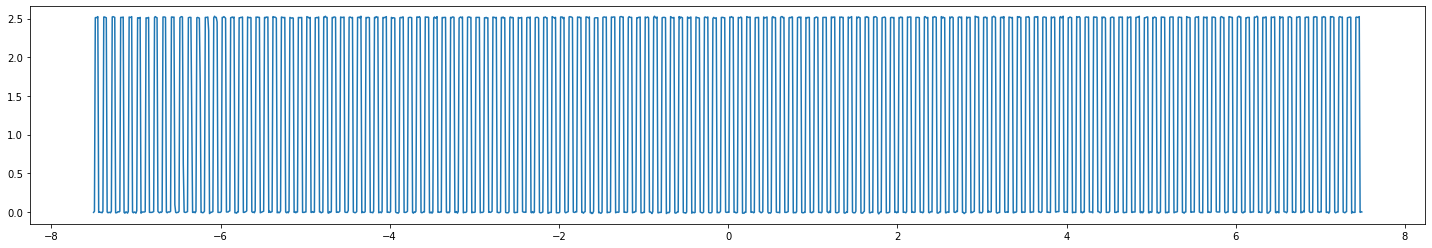

In [10]:
plt.figure().set_figwidth(25)
plt.plot(df['t2'], df['ch2'])

### Open Loop Behavior - Circuit 1

Open loop circuits include an op-amp that isn't connected back to a Voltage + or Voltage - (both are Vin points). This configuration has errors because there is no feedback (as there is with a Voltage follower circuit) and this means the output voltage can be more affected by noise in the circuit. In other words, because there isn't a closed loop (like a Voltage follower circuit), external noise can be present, causing the signal to be faulty. 

These configurations are useful for reference voltages. Ie - you can place a channel output at a different spot to get an output to see how this matches with another Vin or Vout point. 

Graph shows the correct Vout as measured by channel 1 of the Wave Generator set to a Triangular Wave. The Rectangular Wave is the result of channel 2 which produces a similar graphic to all op-amp systems where the output voltage changes between two specific values and some in between if you zoom in and take the limit. 

If the triangle wave is above 5, the rectangle shoots up to Vdd (highest voltage - in this pset it's 5) or moves to Vss (lowest voltage - in this pset it's 0 or ground). 

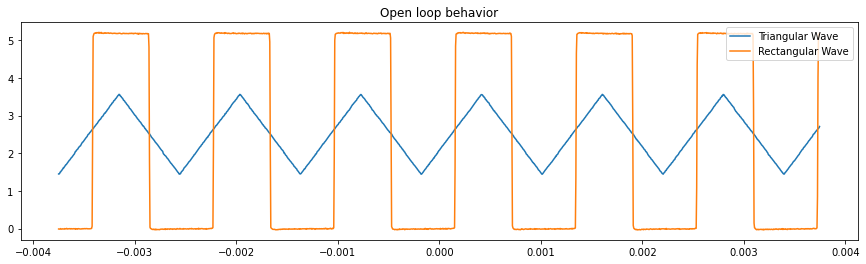

In [18]:
df2 = pd.read_csv('pset6-figure1')
plt.figure().set_figwidth(15)
plt.plot(df2['t1'], df2['ch1'], df2['t1'], df2['ch2'])
plt.title('Open loop behavior')
plt.legend(['Triangular Wave', 'Rectangular Wave'], loc='best')